# Plot embedded data

In [1]:
using NPZ, Printf, NNlib, Statistics, Plots, JLD2, LinearAlgebra, Distributions

## PCA Vis

In [2]:
data_pca = npzread("data/I1_sim1_pca_uniq.npy")

Dict{String, Array} with 6 entries:
  "time_fract" => [0.0121251, 0.00127632, 0.0382897, 0.000638162, 0.00191449, 0…
  "time_HT"    => [1.0e-9, 2.0e-9, 6.0e-8, 1.0e-9, 0.0, 1.0e-9, 0.0, 1.0e-9, 0.…
  "energy"     => [0.0, 1.8, 0.1, 3.6, 1.8, 1.5, -0.4, 1.0, 2.6, -1.5  …  1.5, …
  "occp"       => [0.00986193, 0.00394477, 0.00197239, 0.00197239, 0.00986193, …
  "time_count" => [1.9e-8, 2.0e-9, 6.0e-8, 1.0e-9, 3.0e-9, 8.0e-9, 1.94e-7, 1.2…
  "pca"        => Float32[4.64775 0.732769 -0.367821; -2.65496 -4.12409 2.99347…

In [3]:
X = data_pca["pca"][:,1]; Y = data_pca["pca"][:,2]; Z = data_pca["pca"][:,3]
time_fract = data_pca["time_fract"]; time_HT = data_pca["time_HT"]
energy = data_pca["energy"]
occp = data_pca["occp"];

#### Plot PCA with 2 components X,Y-axes and occupancy density as Z-axis with color

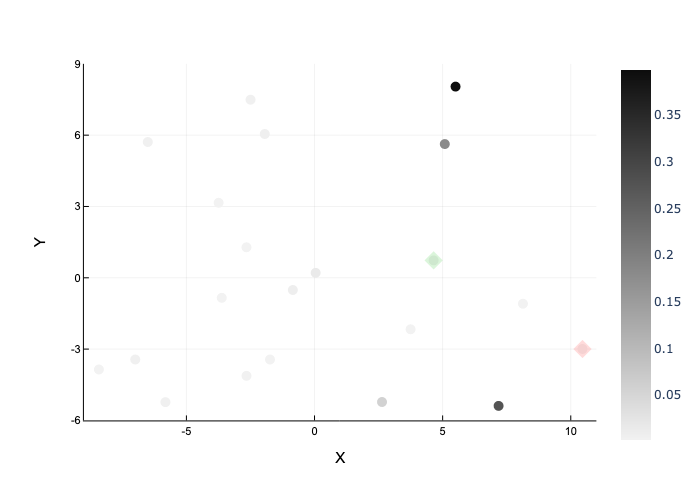

In [11]:
# 2D
plotlyjs()
plot()

scatter!(X,Y,zcolor=occp,m=cgrad(:grays,rev=true),markerstrokewidth=0,markersize=5,legend=false)

plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.2) # Green for Si
plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.2) # Red for Sf

xlims!(floor(minimum(X)),ceil(maximum(X)))
ylims!(floor(minimum(Y)),ceil(maximum(Y)))

plot!(xlabel="X", ylabel="Y")

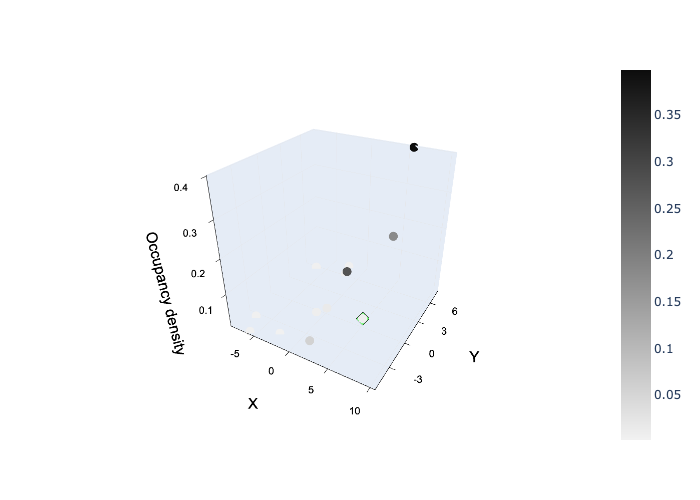

In [14]:
# 3D
plotlyjs()
plot()

scatter!(X,Y,occp,zcolor=occp,m=cgrad(:grays,rev=true),markerstrokewidth=0,markersize=2.5,legend=false)

plot!([X[1]],[Y[1]],[occp[1]], seriestype = :scatter, markersize=3,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.8) # Green for Si
plot!([X[end]],[Y[end]],[occp[end]], seriestype = :scatter, markersize=3,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.8) # Red for Sf

xlims!(minimum(X)*1.01,maximum(X)*1.01) 
ylims!(minimum(Y)*1.01,maximum(Y)*1.01)
zlims!(minimum(occp)*1.01,maximum(occp)*1.01)

plot!(xlabel="X", ylabel="Y", zlabel = "Occupancy density")



#### Plot PCA with 3 components X,Y,Z-axes, and occupancy density as color 

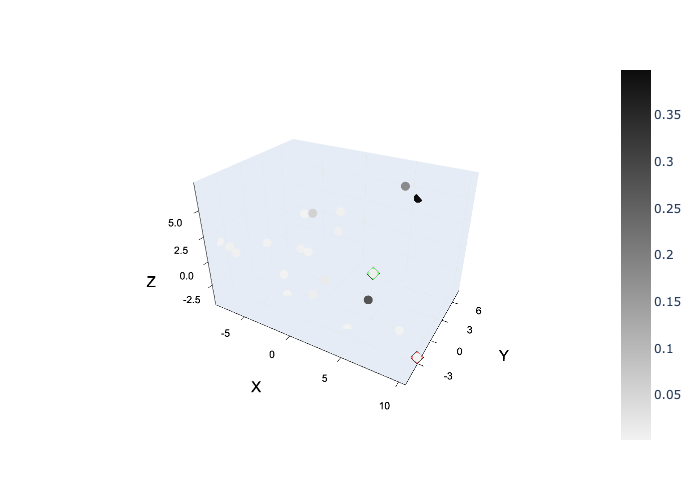

In [16]:
# 3D
plotlyjs()
plot()

scatter!(X,Y,Z,zcolor=occp,m=cgrad(:grays,rev=true),markerstrokewidth=0,markersize=2.5,legend=false)

plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=3,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=0.8) # Green for Si
plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=3,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=0.8) # Red for Sf

xlims!(minimum(X)*1.01,maximum(X)*1.01) 
ylims!(minimum(Y)*1.01,maximum(Y)*1.01)
zlims!(minimum(Z)*1.01,maximum(Z)*1.01)

plot!(xlabel="X", ylabel="Y", zlabel = "Z")


## PHATE Vis

In [18]:
data_phate = npzread("data/I1_sim1_phate_uniq.npy")

Dict{String, Array{Float64}} with 6 entries:
  "time_fract" => [0.0121251, 0.00127632, 0.0382897, 0.000638162, 0.00191449, 0…
  "time_HT"    => [1.0e-9, 2.0e-9, 6.0e-8, 1.0e-9, 0.0, 1.0e-9, 0.0, 1.0e-9, 0.…
  "energy"     => [0.0, 1.8, 0.1, 3.6, 1.8, 1.5, -0.4, 1.0, 2.6, -1.5  …  1.5, …
  "occp"       => [0.00986193, 0.00394477, 0.00197239, 0.00197239, 0.00986193, …
  "time_count" => [1.9e-8, 2.0e-9, 6.0e-8, 1.0e-9, 3.0e-9, 8.0e-9, 1.94e-7, 1.2…
  "phate"      => [0.172399 -0.0113706; -0.165165 0.136805; … ; 0.331399 0.0010…

In [19]:
X = data_phate["phate"][:,1]; Y = data_phate["phate"][:,2]
time_fract = data_phate["time_fract"]; time_HT = data_phate["time_HT"]
energy = data_phate["energy"]
occp = data_phate["occp"];

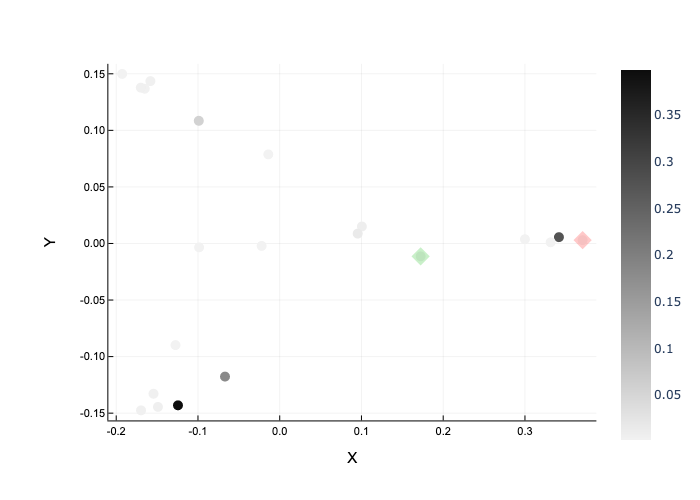

In [21]:
# 2D
plotlyjs()
plot()

scatter!(X,Y,zcolor=occp,m=cgrad(:grays,rev=true),markerstrokewidth=0,markersize=5,legend=false)

plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.3) # Green for Si
plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.3) # Red for Sf
plot!(xlabel="X", ylabel="Y")

## Multiple trajectories

#### PCA

In [23]:
data_pca_S1 = npzread("data/I1_sims_pca_uniq.npy")

Dict{String, Array} with 4 entries:
  "time_HT" => [2.0e-9, 1.0e-9, 0.0, 1.0e-9, 0.0, 1.0e-9, 2.0e-9, 1.0e-9, 0.0, …
  "energy"  => [0.0, 1.8, 1.5, -0.4, -1.5, -0.1, 1.0, 1.8, 3.1, 3.4  …  7.4, 8.…
  "occp"    => [0.0345906, 0.0134888, 0.0180388, 0.251696, 0.35884, 0.167138, 0…
  "pca"     => Float32[20.1575 40.9607 0.424682; 0.547841 15.2189 -1.76454; … ;…

In [24]:
X = data_pca_S1["pca"][:,1]; Y = data_pca_S1["pca"][:,2]; Z = data_pca_S1["pca"][:,3]
time_HT = data_pca_S1["time_HT"]
energy = data_pca_S1["energy"]
occp = data_pca_S1["occp"];

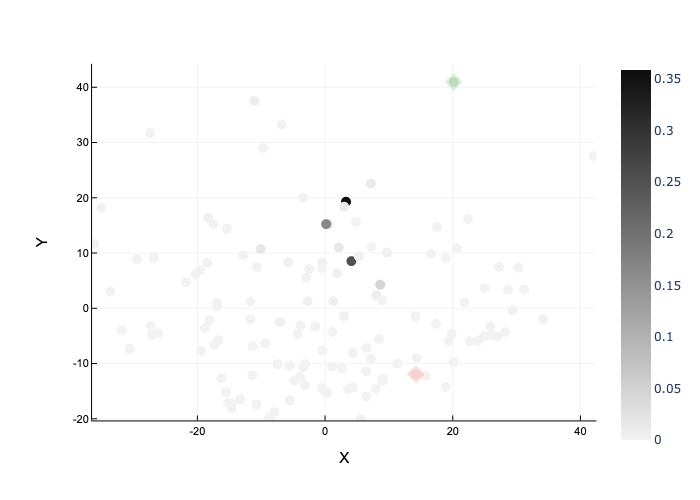

In [29]:
# 2D
plotlyjs()
plot()

scatter!(X,Y,zcolor=occp,m=cgrad(:grays,rev=true),markerstrokewidth=0,markersize=5,legend=false)

plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.2) # Green for Si
plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.2) # Red for Sf

xlims!(minimum(X)*1.01,maximum(X)*1.01) 
ylims!(minimum(Y)*1.01,maximum(Y)*1.08)

plot!(xlabel="X", ylabel="Y")

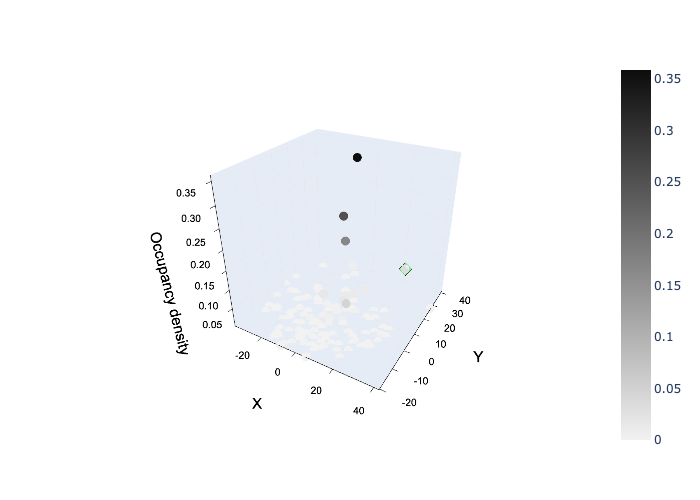

In [30]:
# 3D
plotlyjs()
plot()

scatter!(X,Y,occp,zcolor=occp,m=cgrad(:grays,rev=true),markerstrokewidth=0,markersize=2.5,legend=false)

plot!([X[1]],[Y[1]],[occp[1]], seriestype = :scatter, markersize=3,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.8) # Green for Si
plot!([X[end]],[Y[end]],[occp[end]], seriestype = :scatter, markersize=3,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.8) # Red for Sf

xlims!(minimum(X)*1.01,maximum(X)*1.01) 
ylims!(minimum(Y)*1.01,maximum(Y)*1.01)
zlims!(minimum(occp)*1.01,maximum(occp)*1.01)

plot!(xlabel="X", ylabel="Y", zlabel = "Occupancy density")



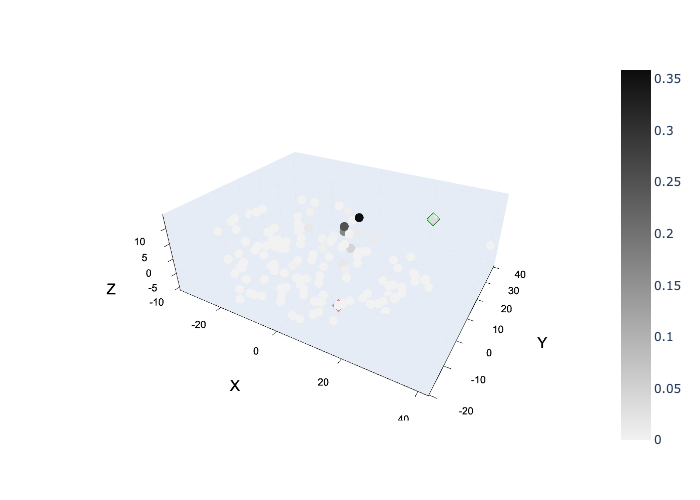

In [32]:
# 3D
plotlyjs()
plot()

scatter!(X,Y,Z,zcolor=occp,m=cgrad(:grays,rev=true),markerstrokewidth=0,markersize=2.5,legend=false)

plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=3,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=0.8) # Green for Si
plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=3,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=0.8) # Red for Sf

xlims!(minimum(X)*1.01,maximum(X)*1.01) 
ylims!(minimum(Y)*1.01,maximum(Y)*1.01)
zlims!(minimum(Z)*1.01,maximum(Z)*1.01)

plot!(xlabel="X", ylabel="Y", zlabel = "Z")


#### PHATE

In [45]:
data_phate_S1 = npzread("data/I1_sims_phate_uniq.npy")

Dict{String, Array{Float64}} with 4 entries:
  "time_HT" => [2.0e-9, 1.0e-9, 0.0, 1.0e-9, 0.0, 1.0e-9, 2.0e-9, 1.0e-9, 0.0, …
  "energy"  => [0.0, 1.8, 1.5, -0.4, -1.5, -0.1, 1.0, 1.8, 3.1, 3.4  …  7.4, 8.…
  "occp"    => [0.0345906, 0.0134888, 0.0180388, 0.251696, 0.35884, 0.167138, 0…
  "phate"   => [0.0365745 -0.0328566; 0.0462346 -0.0186296; … ; -0.126457 0.023…

In [51]:
X = data_phate_S1["phate"][:,1]; Y = data_phate_S1["phate"][:,2]
time_HT = data_phate_S1["time_HT"]
energy = data_phate_S1["energy"]
occp = data_phate_S1["occp"];

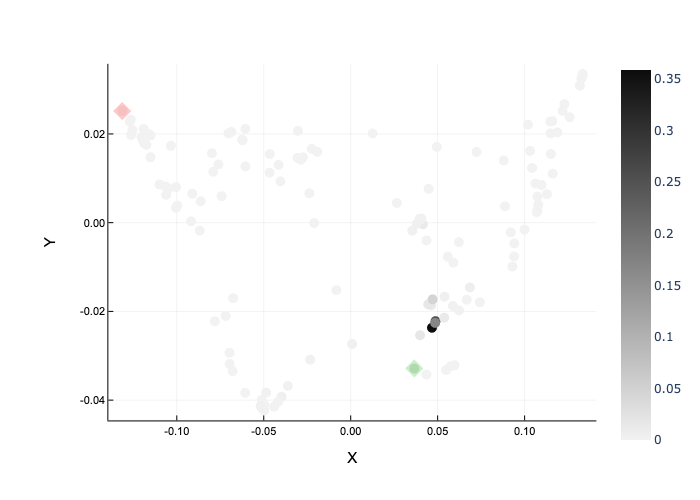

In [52]:
# 2D
plotlyjs()
plot()

scatter!(X,Y,zcolor=occp,m=cgrad(:grays,rev=true),markerstrokewidth=0,markersize=5,legend=false)

plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.3) # Green for Si
plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.3) # Red for Sf
plot!(xlabel="X", ylabel="Y")